Que. 2 

Create a Simple Linear Regression model for a given dataset by using polynomial regression.

Datasets:
1. NewspaperData.csv
Independent = ‘Daily’, Dependent=’Sunday’

2. delivery_time.csv
Independent = ‘Sorting Time’, Dependent=’Delivery Time’

3. WC_AT.csv
Independent = ‘Waist’, Dependent=’AT’
Adipose Tissue (AT) and Waist Circumference(Waist)

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('NewspaperData.csv')
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Newspaper'])
df['Newspaper'] = encoder.transform(df['Newspaper'])
df.head()

,Newspaper,daily,sunday
0,0,391.952,488.506
1,1,516.981,798.298
2,2,355.628,235.084
3,3,238.555,299.451
4,4,537.780,559.093


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     int32  
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 808.0 bytes


In [65]:
df.describe()

,Newspaper,daily,sunday
count,34.000000,34.000000,34.000000
mean,16.500000,430.962471,591.202412
std,9.958246,269.211470,376.418051
min,0.000000,133.239000,202.614000
25%,8.250000,233.021500,327.769500
50%,16.500000,355.235500,436.712500
75%,24.750000,516.616500,699.735250
max,33.000000,1209.225000,1762.015000


In [66]:
df.corr()

,Newspaper,daily,sunday
Newspaper,1.000000,0.003978,0.031973
daily,0.003978,1.000000,0.958154
sunday,0.031973,0.958154,1.000000


In [67]:
X= df.drop(['Newspaper','sunday'],axis=1)
Y= df['sunday']

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=12345)

In [69]:
from sklearn.preprocessing import PolynomialFeatures

# create an object
poly = PolynomialFeatures(degree=2)

# fit the data
poly.fit(X)

# transform the data
X_new = poly.transform(X)
X_new

array([[1.00000000e+00, 3.91952000e+02, 1.53626370e+05],
       [1.00000000e+00, 5.16981000e+02, 2.67269354e+05],
       [1.00000000e+00, 3.55628000e+02, 1.26471274e+05],
       [1.00000000e+00, 2.38555000e+02, 5.69084880e+04],
       [1.00000000e+00, 5.37780000e+02, 2.89207328e+05],
       [1.00000000e+00, 7.33775000e+02, 5.38425751e+05],
       [1.00000000e+00, 1.98832000e+02, 3.95341642e+04],
       [1.00000000e+00, 2.52624000e+02, 6.38188854e+04],
       [1.00000000e+00, 2.06204000e+02, 4.25200896e+04],
       [1.00000000e+00, 2.31177000e+02, 5.34428053e+04],
       [1.00000000e+00, 4.49755000e+02, 2.02279560e+05],
       [1.00000000e+00, 2.88571000e+02, 8.32732220e+04],
       [1.00000000e+00, 1.85736000e+02, 3.44978617e+04],
       [1.00000000e+00, 1.16438800e+03, 1.35579941e+06],
       [1.00000000e+00, 4.44581000e+02, 1.97652266e+05],
       [1.00000000e+00, 4.12871000e+02, 1.70462463e+05],
       [1.00000000e+00, 2.72280000e+02, 7.41363984e+04],
       [1.00000000e+00, 7.81796

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_new, Y)

LinearRegression()

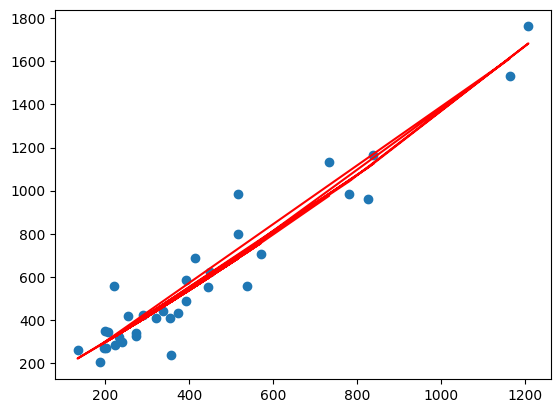

In [72]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X_new), color="red", label="Regression Line")

In [73]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [75]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [76]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [77]:
encoder_gender = LabelEncoder()

# fit the geography data
encoder_gender.fit(df['Sorting Time'])

# tansform the values
df['Sorting Time'] = encoder_gender.transform(df['Sorting Time'])

In [78]:
X = df['Sorting Time']
Y = df['Delivery Time']

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=12345)

In [80]:
from sklearn.preprocessing import PolynomialFeatures

# create an object
poly = PolynomialFeatures(degree=5)
x_train=pd.DataFrame(x_train)
# fit the data
poly.fit(x_train)

# transform the data
X_new = poly.transform(x_train)
X_new


# from sklearn.preprocessing import PolynomialFeatures

# # create an object
# poly = PolynomialFeatures(degree=2)

# # fit the data
# poly.fit(X)

# # transform the data
# X_new = poly.transform(X)
# X_new

array([[1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 2

In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_new, y_train)

LinearRegression()

In [83]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X_new), color="red", label="Regression Line")

KeyError: 'Sorting Time'

In [84]:
df = pd.read_csv('WC_AT.csv')
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [86]:
df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [87]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [88]:
X = df['Waist']
Y = df['AT']

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.7,random_state=12345)

In [93]:
from sklearn.preprocessing import PolynomialFeatures

# create an object
poly = PolynomialFeatures(degree=2)

x_train=pd.DataFrame(x_train)
poly.fit(x_train)

# transform the data
X_new = poly.transform(x_train)
X_new

array([[1.0000000e+00, 8.6300000e+01, 7.4476900e+03],
       [1.0000000e+00, 6.3500000e+01, 4.0322500e+03],
       [1.0000000e+00, 8.1800000e+01, 6.6912400e+03],
       [1.0000000e+00, 8.0900000e+01, 6.5448100e+03],
       [1.0000000e+00, 8.3800000e+01, 7.0224400e+03],
       [1.0000000e+00, 9.8000000e+01, 9.6040000e+03],
       [1.0000000e+00, 7.9800000e+01, 6.3680400e+03],
       [1.0000000e+00, 9.4500000e+01, 8.9302500e+03],
       [1.0000000e+00, 8.3500000e+01, 6.9722500e+03],
       [1.0000000e+00, 1.0710000e+02, 1.1470410e+04],
       [1.0000000e+00, 9.6500000e+01, 9.3122500e+03],
       [1.0000000e+00, 8.3000000e+01, 6.8890000e+03],
       [1.0000000e+00, 8.6600000e+01, 7.4995600e+03],
       [1.0000000e+00, 7.4750000e+01, 5.5875625e+03],
       [1.0000000e+00, 7.4150000e+01, 5.4982225e+03],
       [1.0000000e+00, 1.0850000e+02, 1.1772250e+04],
       [1.0000000e+00, 8.0900000e+01, 6.5448100e+03],
       [1.0000000e+00, 1.0400000e+02, 1.0816000e+04],
       [1.0000000e+00, 9.430

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_new, y_train)

LinearRegression()

ValueError: x and y must have same first dimension, but have shapes (109,) and (76,)

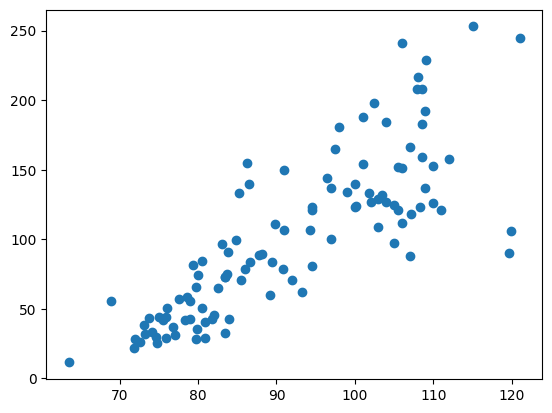

In [95]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X_new), color="red", label="Regression Line")